#Autoencoders for image compression

## Linear autoencoder

### Importing the libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

'2.8.2'

### Loading the dataset

- Dataset: https://keras.io/api/datasets/mnist/

In [2]:
from tensorflow.keras.datasets import mnist

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

In [6]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [7]:
y_train[0]

5

### Visualizing the images

In [8]:
np.random.randint(0, 59999)

19904

8


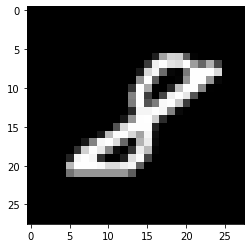

In [9]:
i = np.random.randint(0, 59999)
print(y_train[i])
plt.imshow(X_train[i], cmap='gray');

In [10]:
np.arange(0, 100)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99])

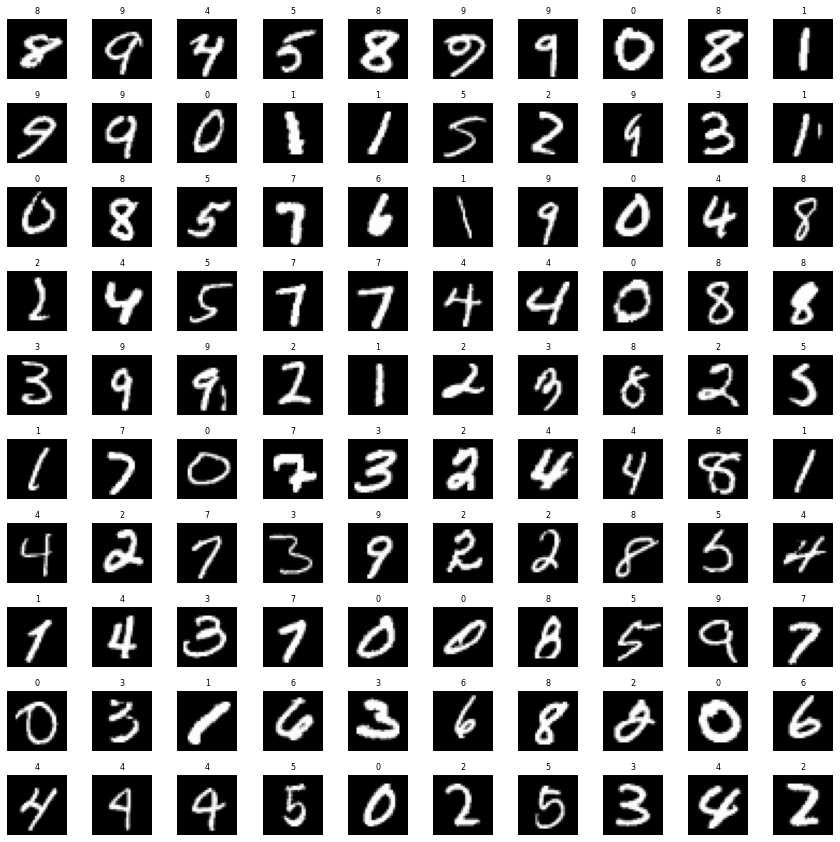

In [11]:
width = 10
height = 10
fig, axes = plt.subplots(height, width, figsize=(15, 15))
#print(axes.shape)
axes = axes.ravel() # -> (10,10) -> [100]
#print(axes.shape)
for i in np.arange(0, width * height):
  index = np.random.randint(0, 59999)
  axes[i].imshow(X_train[index], cmap = 'gray')
  axes[i].set_title(y_train[index], fontsize = 8)
  axes[i].axis('off')
plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [12]:
X_train[0].min(), X_train[0].max()

(0, 255)

In [13]:
X_train = X_train / 255
X_test = X_test / 255

In [14]:
X_train[0].min(), X_train[0].max()

(0.0, 1.0)

In [15]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [16]:
X_train.shape[0], X_train.shape[1], X_train.shape[2]

(60000, 28, 28)

In [17]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_train.shape

(60000, 784)

In [18]:
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])
X_test.shape

(10000, 784)

### Building and training the linear autoencoder

In [19]:
# 784 - 128 - 64 - 32 - 64 - 128 - 784

In [20]:
autoencoder = Sequential()

# Encode
autoencoder.add(Dense(units = 128, activation='relu', input_dim = 784))
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 32, activation='relu')) # Encoded image

# Decode
autoencoder.add(Dense(units = 64, activation='relu'))
autoencoder.add(Dense(units = 128, activation='relu'))
autoencoder.add(Dense(units = 784, activation='sigmoid'))

In [21]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [22]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [23]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [24]:
autoencoder.fit(X_train, X_train, epochs=50)

Epoch 1/50
1875/1875 [==============================] - 8s 3ms/step - loss: 0.1516 - accuracy: 0.0115
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1086 - accuracy: 0.0122
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1000 - accuracy: 0.0122
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0953 - accuracy: 0.0122
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0923 - accuracy: 0.0147
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0902 - accuracy: 0.0144
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0888 - accuracy: 0.0144
Epoch 8/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0877 - accuracy: 0.0141
Epoch 9/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0869 - accuracy: 0.0138
Epoch 10/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.086

### Encoding the images

In [25]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [26]:
autoencoder.input

<KerasTensor: shape=(None, 784) dtype=float32 (created by layer 'dense_input')>

In [27]:
autoencoder.get_layer('dense_2').output

<KerasTensor: shape=(None, 32) dtype=float32 (created by layer 'dense_2')>

In [28]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('dense_2').output)

In [29]:
encoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
Total params: 110,816
Trainable params: 110,816
Non-trainable params: 0
_________________________________________________________________


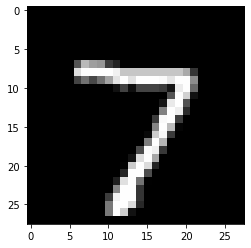

In [30]:
plt.imshow(X_test[0].reshape(28,28), cmap='gray');

In [31]:
X_test[0].shape

(784,)

In [32]:
X_test[0].reshape(1, -1).shape

(1, 784)

In [33]:
encoded_image = encoder.predict(X_test[0].reshape(1,-1))

In [34]:
encoded_image, encoded_image.shape

(array([[1.5088165, 2.2672324, 0.       , 4.6175814, 4.734528 , 3.2782288,
         2.2952685, 1.6086249, 3.3121753, 4.159616 , 5.8891244, 3.2084873,
         4.7046123, 3.1425116, 0.       , 6.973556 , 3.6418223, 6.691119 ,
         0.       , 2.4361138, 5.404133 , 0.       , 2.6508417, 2.0878234,
         6.4571824, 5.3012166, 8.434517 , 2.6032736, 7.189928 , 2.8676052,
         5.266806 , 5.368786 ]], dtype=float32), (1, 32))

In [35]:
8 * 4

32

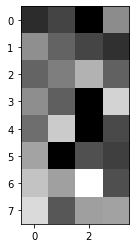

In [36]:
plt.imshow(encoded_image.reshape(8,4), cmap='gray');

### Decoding the images

In [37]:
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 222,384
Trainable params: 222,384
Non-trai

In [38]:
input_layer_decoder = Input(shape=(32,))
decoder_layer1 = autoencoder.layers[3]
decoder_layer2 = autoencoder.layers[4]
decoder_layer3 = autoencoder.layers[5]
decoder = Model(inputs = input_layer_decoder, outputs = decoder_layer3(decoder_layer2(decoder_layer1(input_layer_decoder))))
decoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32)]              0         
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               101136    
                                                                 
Total params: 111,568
Trainable params: 111,568
Non-trainable params: 0
_________________________________________________________________


In [39]:
decoded_image = decoder.predict(encoded_image)

In [40]:
decoded_image.shape

(1, 784)

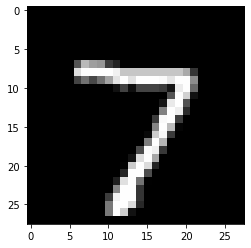

In [41]:
plt.imshow(X_test[0].reshape(28,28), cmap = 'gray');

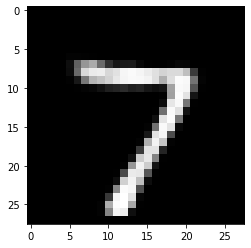

In [42]:
plt.imshow(decoded_image.reshape(28,28), cmap='gray');

### Encoding and decoding the test images

In [43]:
X_test.shape[0] # 9999

10000

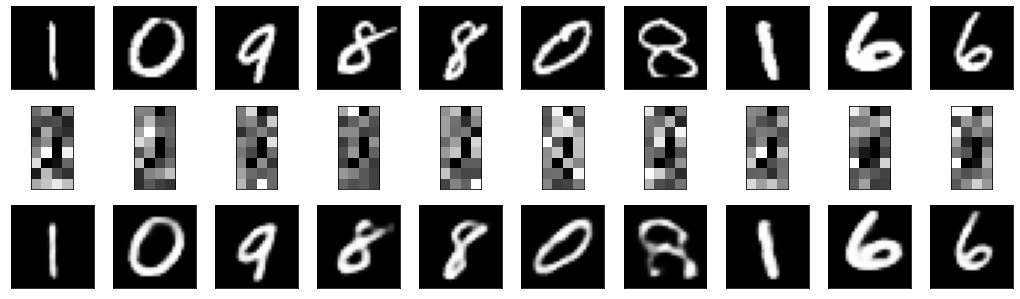

In [44]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0] - 1, size = n_images)
#print(test_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  #print(i, image_index)
  # Original image
  ax = plt.subplot(10,10,i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10,i + 1 + n_images)
  encoded_image = encoder.predict(X_test[image_index].reshape(1,-1))
  plt.imshow(encoded_image.reshape(8,4), cmap = 'gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10,i + 1 + n_images * 2)
  plt.imshow(decoder.predict(encoded_image).reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

## Convolutional autoencoders

### Importing the libraries

In [45]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, UpSampling2D, Reshape, Flatten

### Loading the dataset

- Dataset: https://keras.io/api/datasets/fashion_mnist/

In [46]:
from tensorflow.keras.datasets import fashion_mnist

In [47]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [48]:
X_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [49]:
X_test.shape, y_test.shape

((10000, 28, 28), (10000,))

### Visualizing the images

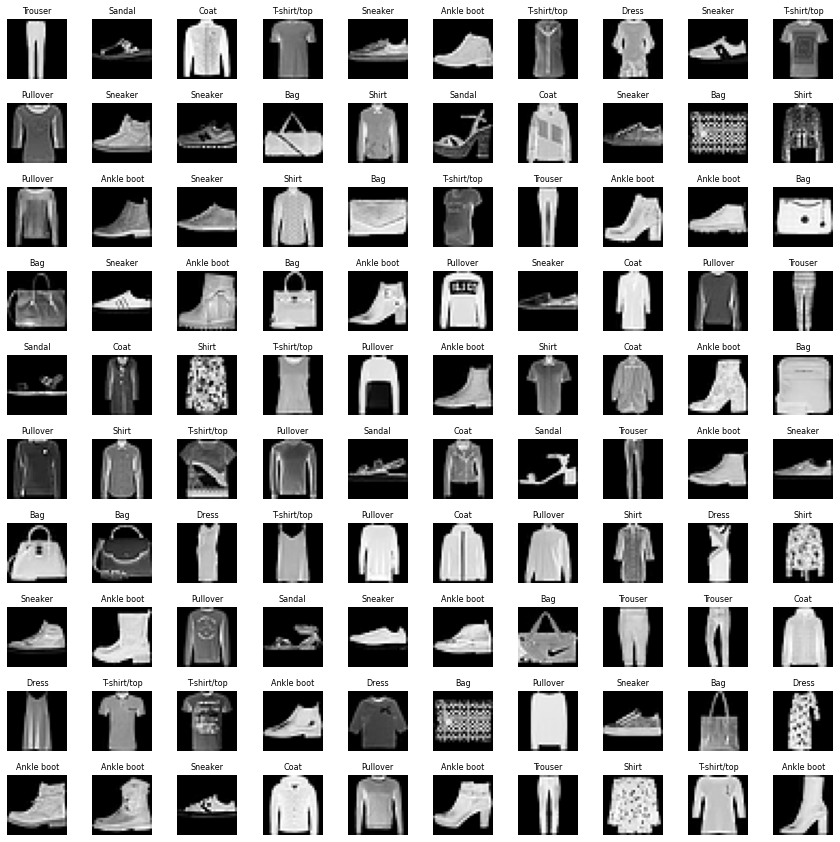

In [50]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
width = 10
height = 10

fig, axes = plt.subplots(height, width, figsize = (15,15))
axes = axes.ravel()
for i in np.arange(0, width * height):
    index = np.random.randint(0, 60000)
    axes[i].imshow(X_train[index], cmap = 'gray' )
    axes[i].set_title(classes[y_train[index]], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

### Pre-processing the images

In [51]:
X_train = X_train / 255
X_test = X_test / 255

In [52]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [53]:
X_train = X_train.reshape((len(X_train), 28, 28, 1))
X_test = X_test.reshape((len(X_test), 28, 28, 1))

In [54]:
X_train.shape, X_test.shape

((60000, 28, 28, 1), (10000, 28, 28, 1))

### Building and training the convolutional autoencoder

In [55]:
# Padding: https://www.pico.net/kb/what-is-the-difference-between-same-and-valid-padding-in-tf-nn-max-pool-of-tensorflow

autoencoder = Sequential()

# Encoder
autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu', padding='valid', input_shape=(28,28,1)))
autoencoder.add(MaxPooling2D(pool_size=(2,2)))

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(MaxPooling2D(pool_size=(2,2), padding='same'))

#autoencoder.summary()

autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding = 'same', strides=(2,2)))

autoencoder.add(Flatten())

#autoencoder.summary()

# Decoder

autoencoder.add(Reshape((4,4,8)))
#autoencoder.summary()
autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
#autoencoder.summary()
autoencoder.add(UpSampling2D(size=(2,2)))
#autoencoder.summary()

autoencoder.add(Conv2D(filters = 8, kernel_size=(3,3), activation='relu', padding='same'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 16, kernel_size=(3,3), activation='relu'))
autoencoder.add(UpSampling2D(size=(2,2)))

autoencoder.add(Conv2D(filters = 1, kernel_size=(3,3), activation='sigmoid', padding='same'))
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)              

In [56]:
# Output = (Input - Filter + 1) / Stride

# Input: (28, 28, 1)
# Filter size: 3
# Output: (28 - 3 + 1) / 1 = 26 -> (26, 26, 16)

# UpSampling2D: (16, 16, 8)
# Filter size: 3
# Output: (16 - 3 + 1) / 1 = 14 -> (14, 14, 16)

In [57]:
(28 - 3 + 1) / 1, (16 - 3 + 1) / 1

(26.0, 14.0)

In [58]:
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy', metrics = ['accuracy'])

In [59]:
autoencoder.fit(X_train, X_train, epochs = 50)

Epoch 1/50
1875/1875 [==============================] - 17s 4ms/step - loss: 0.3140 - accuracy: 0.5038
Epoch 2/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2910 - accuracy: 0.5061
Epoch 3/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2867 - accuracy: 0.5067
Epoch 4/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2841 - accuracy: 0.5070
Epoch 5/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2822 - accuracy: 0.5072
Epoch 6/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2807 - accuracy: 0.5074
Epoch 7/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2795 - accuracy: 0.5075
Epoch 8/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2786 - accuracy: 0.5076
Epoch 9/50
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2778 - accuracy: 0.5077
Epoch 10/50
1875/1875 [==============================] - 8s 4ms/step - loss: 0.27

### Encoding and decoding the test images

In [60]:
autoencoder.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584       
                                                                 
 flatten (Flatten)           (None, 128)              

In [63]:
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.get_layer('flatten').output)
encoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 26, 26, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 8)           584 

In [64]:
coded_test_images = encoder.predict(X_test)

In [65]:
coded_test_images.shape

(10000, 128)

In [66]:
coded_test_images[0]

array([0.08481273, 0.12665002, 0.713977  , 0.2581728 , 0.99470526,
       1.6412168 , 1.0762972 , 1.6173358 , 0.24773246, 0.09850786,
       0.82395214, 0.12955627, 0.9161045 , 1.8289908 , 1.1835134 ,
       1.5418851 , 0.4510823 , 0.28648782, 0.8509518 , 0.29526722,
       1.0559939 , 1.8795291 , 1.3683883 , 1.4831611 , 0.44181395,
       0.43765157, 0.90325606, 0.        , 0.6965548 , 1.4704983 ,
       0.84392136, 0.9738835 , 0.05993892, 0.79814076, 0.57523835,
       0.3421542 , 1.154516  , 2.2835937 , 1.1752145 , 1.5814517 ,
       1.3833531 , 1.7299337 , 0.35626936, 0.8018866 , 0.8067051 ,
       2.5969338 , 1.2446446 , 1.6221184 , 3.5310497 , 1.9190996 ,
       0.        , 0.0365081 , 1.264642  , 2.5425725 , 1.3667831 ,
       0.35026056, 2.6692164 , 1.0295748 , 0.        , 0.        ,
       1.9958055 , 1.7350929 , 2.4018166 , 0.7120538 , 2.1349573 ,
       1.0712198 , 0.30868906, 0.        , 0.7572011 , 2.668867  ,
       0.89194036, 0.69000125, 3.8000655 , 1.407756  , 0.     

In [67]:
decoded_test_images = autoencoder.predict(X_test)
decoded_test_images.shape

(10000, 28, 28, 1)

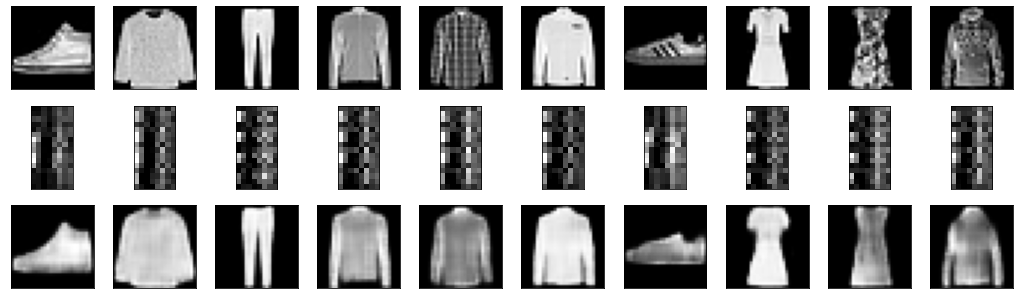

In [68]:
n_images = 10
test_images = np.random.randint(0, X_test.shape[0], size = n_images)
plt.figure(figsize=(18,18))
for i, image_index in enumerate(test_images):
  # Original images
  ax = plt.subplot(10,10, i + 1)
  plt.imshow(X_test[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Coded images
  ax = plt.subplot(10,10, i + 1 + n_images)
  plt.imshow(coded_test_images[image_index].reshape(16,8), cmap='gray')
  plt.xticks(())
  plt.yticks(())

  # Decoded images
  ax = plt.subplot(10,10, i + 1 + n_images * 2)
  plt.imshow(decoded_test_images[image_index].reshape(28,28), cmap='gray')
  plt.xticks(())
  plt.yticks(())

In [69]:
16 * 8

128